# 59 双向循环神经网络

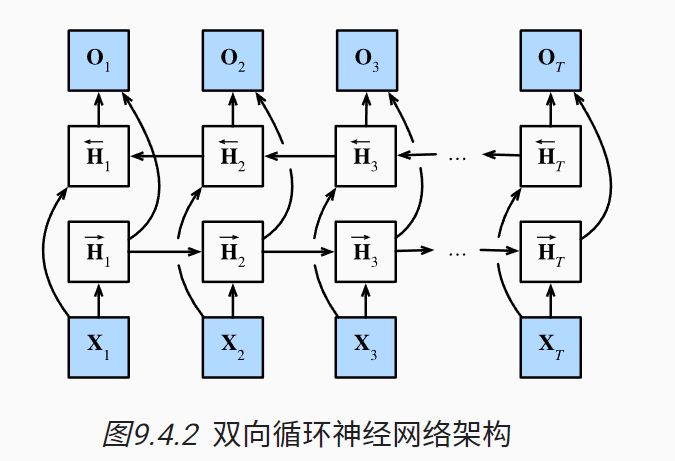

增加一个“从最后一个词元开始从后向前运行”的循环神经网络，而不是只有一个在前向模式下“从第一个词元开始运行”的循环神经网络。</br>
双向循环神经网络（bidirectional RNNs） 添加了反向传递信息的隐藏层，以便更灵活地处理此类信息。</br>
双向循环神经网络的一个关键特性是：使用来自序列两端的信息来估计输出。 </br>
也就是说，我们使用来自过去和未来的观测信息来预测当前的观测。 </br>
但是在对下一个词元进行预测的情况中，这样的模型并不是我们所需的。 因为在预测下一个词元时，我们终究无法知道下一个词元的下文是什么， 所以将不会得到很好的精度。 </br>
具体地说，在训练期间，我们能够利用过去和未来的数据来估计现在空缺的词； 而在测试期间，我们只有过去的数据，因此精度将会很差。</br>
另一个严重问题是，双向循环神经网络的计算速度非常慢。 其主要原因是网络的前向传播需要在双向层中进行前向和后向递归， 并且网络的反向传播还依赖于前向传播的结果。 因此，梯度求解将有一个非常长的链。</br>
双向层的使用在实践中非常少，并且仅仅应用于部分场合。 例如，填充缺失的单词、词元注释（例如，用于命名实体识别） 以及作为序列处理流水线中的一个步骤对序列进行编码（例如，用于机器翻译）。</br>

## 双向循环神经网络的错误应用
由于双向循环神经网络使用了过去的和未来的数据， 所以我们不能盲目地将这一语言模型应用于任何预测任务。 尽管模型产出的困惑度是合理的， 该模型预测未来词元的能力却可能存在严重缺陷。 我们用下面的示例代码引以为戒，以防在错误的环境中使用它们。

perplexity 1.1, 164284.1 tokens/sec on cuda:0
time travellerererererererererererererererererererererererererer
travellerererererererererererererererererererererererererer


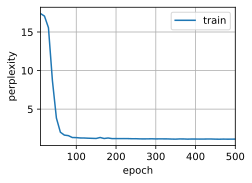

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

# 加载数据
batch_size, num_steps, device = 32, 35, d2l.try_gpu()
train_iter, vocab = d2l.load_data_time_machine(batch_size, num_steps)
# 通过设置“bidirective=True”来定义双向LSTM模型
vocab_size, num_hiddens, num_layers = len(vocab), 256, 2
num_inputs = vocab_size
lstm_layer = nn.LSTM(num_inputs, num_hiddens, num_layers, bidirectional=True)
model = d2l.RNNModel(lstm_layer, len(vocab))
model = model.to(device)
# 训练模型
num_epochs, lr = 500, 1
d2l.train_ch8(model, train_iter, vocab, lr, num_epochs, device)

上述结果显然令人瞠目结舌

#### 在双向循环神经网络中，每个时间步的隐状态由当前时间步的前后数据同时决定。

#### 双向循环神经网络与概率图模型中的“前向-后向”算法具有相似性。

#### 双向循环神经网络主要用于序列编码和给定双向上下文的观测估计。

#### 由于梯度链更长，因此双向循环神经网络的训练代价非常高。